In [1]:
from dotenv import load_dotenv, find_dotenv

# Load the API keys from .env
load_dotenv(find_dotenv(), override=True)

True

<!-- ## partition pdf using unstructured.io -->

In [2]:
# from src.get_structured_from_unstructured import get_pdf_chunks
# chunks = get_pdf_chunks()

In [3]:
from src.get_structured_from_unstructured import load_chunks
chunks = load_chunks()

e:\Github Repositories\multimodal-rag-for-healthcare-unstructured.io\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
len(chunks)

1388

In [5]:
chunks[0]

In [6]:
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.Table'>",
 "<class 'unstructured.documents.elements.TableChunk'>"}

In [7]:
chunks[0].metadata.orig_elements

In [8]:
elements = chunks[0].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': '0896b804-ae61-4174-b37f-cfe4b17f3528',
 'text': '® Check for updates',
 'metadata': {'coordinates': {'points': ((1341.6666666666665,
     36.11111111111111),
    (1341.6666666666665, 97.22222222222221),
    (1619.4444444444443, 97.22222222222221),
    (1619.4444444444443, 36.11111111111111)),
   'system': 'PixelSpace',
   'layout_width': 1625,
   'layout_height': 2175},
  'last_modified': '2025-02-09T10:44:44',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 1,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAA9ARUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW

<!-- ## serialize chunks -->

<!-- ## load chunks -->

<!-- ## get tables and text in separate lists -->

In [9]:
from src.get_structured_from_unstructured import separate_tables_and_text
texts_and_tables = separate_tables_and_text(chunks)

texts = texts_and_tables['texts']
tables = texts_and_tables['tables']

In [10]:
len(tables), len(texts)

(108, 1280)

In [11]:
tables[0], texts[0]

(<unstructured.documents.elements.TableChunk at 0x22221d31890>,
 <unstructured.documents.elements.CompositeElement at 0x222218819d0>)

In [12]:
from src.get_structured_from_unstructured import get_images_base64

images = get_images_base64(chunks)

In [13]:
len(images)

21

In [14]:
images

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAA9ARUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3JNMsdi/6LF0/u07+y7D/AJ9If++akR/kX6Uye7jtoWmmcKijJJNAN2V2J/Zdh/z6Q/8AfNH9mWH/AD6w/wDfIrhdX8bXMrslkfJhH8Z+8a54+JrzzNx1GTd67q6PYWXvtI41i3Ub9jCU0uqR63/Zdh/z6Q/980f2XYf8+k

In [15]:
print(images[0])

/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAA9ARUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3JNMsdi/6LF0/u07+y7D/AJ9If++akR/kX6Uye7jtoWmmcKijJJNAN2V2J/Zdh/z6Q/8AfNH9mWH/AD6w/wDfIrhdX8bXMrslkfJhH8Z+8a54+JrzzNx1GTd67q6PYWXvtI41i3Ub9jCU0uqR63/Zdh/z6Q/980f2XYf8+kP/

In [ ]:
from src.utils import display_base64_image

display_base64_image(images[2])

In [17]:
len(texts), len(tables)

(1280, 108)

In [18]:
tables[0].metadata.text_as_html

'<table><tr><td>. Introduction ...</td><td>ve</td></tr><tr><td>. Methodology and</td><td>Evidence Review......... e899</td></tr><tr><td>Organization of the</td><td>Writing Committee....e899</td></tr><tr><td>Document Review</td><td>and Approval ........+0</td></tr><tr><td>Scope of the</td><td>Guideline</td></tr><tr><td>Class of</td><td>Recommendation and</td></tr><tr><td>Level of Evidence...</td><td/></tr><tr><td>1.6 Abbreviati</td><td/></tr><tr><td>. Definition of H</td><td/></tr><tr><td>2.1. Stages o</td><td/></tr><tr><td>2.2. Classification of HF</td><td>by Left Ventricular</td></tr><tr><td>2.3. Ejection Fraction</td><td>(LVEF)... cesses e901 for Classification</td></tr><tr><td>Diagnostic of HF According to</td><td>Algorithm LVEF .... e905</td></tr><tr><td>. Epidemiology and Causes</td><td>of HF..</td></tr><tr><td>3.1. Epidemiology of</td><td>HF ..</td></tr><tr><td>3.2. Cause of HF....</td><td/></tr><tr><td>. Initial and Serial</td><td>Evaluation</td></tr><tr><td>4.1. Clinical Assess

In [19]:
# from langchain_core.rate_limiters import InMemoryRateLimiter

# rate_limiter = InMemoryRateLimiter(
#     requests_per_second=0.1,  
#     check_every_n_seconds=0.1,  
#     max_bucket_size=6,  
# )

In [20]:
from src.chains import summarize_table_text_chain

summarize_table_text_chain.invoke(tables[0].metadata.text_as_html)

'The table outlines the organization and content of a guideline document. Key points include:\n\n- Introduction\n- Methodology and evidence review\n- Organization of the writing committee\n- Document review and approval\n- Scope of the guideline\n- Classification of heart failure (HF) by left ventricular ejection fraction (LVEF)\n- Diagnostic algorithm for HF according to LVEF\n- Epidemiology and causes of HF\n- Initial and serial evaluation of HF, including clinical assessment, laboratory tests, biomarkers, electrocardiographic testing, and cardiac imaging\n- Genetic evaluation and testing\n- Invasive evaluation'

In [21]:
# from src.get_structured_from_unstructured import get_table_summaries

# table_summaries = get_table_summaries(tables)

In [22]:
from src.get_structured_from_unstructured import load_table_summaries

table_summaries = load_table_summaries()
len(table_summaries)

108

In [23]:
# from src.get_structured_from_unstructured import get_image_summaries

# image_summaries = get_image_summaries(images)

In [24]:
from src.get_structured_from_unstructured import load_image_summaries

image_summaries = load_image_summaries()

In [25]:
image_summaries

[{'image_bas64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAA9ARUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3JNMsdi/6LF0/u07+y7D/AJ9If++akR/kX6Uye7jtoWmmcKijJJNAN2V2J/Zdh/z6Q/8AfNH9mWH/AD6w/wDfIrhdX8bXMrslkfJhH8Z+8a54+JrzzNx1GTd67q6PYWXvtI41i3Ub9jCU0uqR63/Zdh

In [26]:
texts[0].text

'® Check for updates\n\nCirculation\n\nAHA/ACC/HFSA CLINICAL PRACTICE GUIDELINE\n\n2022 AHA/ACC/HFSA Guideline for the Management of Heart Failure: A Report of the American College of Cardiology/American Heart Association Joint Committee on Clinical Practice'

In [27]:
texts[0].metadata.fields

mappingproxy({'filetype': 'application/pdf',
              'languages': ['eng'],
              'last_modified': '2025-02-09T10:44:44',
              'page_number': 1,
              'orig_elements': [<unstructured.documents.elements.Image at 0x2225cecb390>,
              'file_directory': 'E:\\python projects\\unstructured-pdf\\data\\documents',
              'filename': 'HFSA Guideline for theManagement of Heart Failure.pdf'})

In [28]:
for i, summary in enumerate(table_summaries):
    print(summary['table_summary'])
    break

Introduction, methodology, and organization of the writing committee are described. 
Document review and approval process is outlined. 
Scope of the guideline is defined, including classification of recommendations and levels of evidence. 
Key sections include epidemiology and causes of heart failure, initial and serial evaluation, diagnosis, risk stratification, genetic evaluation, and cardiac imaging.


In [29]:
for i, summary in enumerate(image_summaries):
    print(summary['image_summary'])
    break

The image is a screenshot of a notification icon for updates.

*   The icon is a red bookmark with a white background, surrounded by a blue and yellow circle.
*   Below the icon, the text "Check for updates" is displayed in gray font.
*   The background of the image is a light gray color.

The purpose of the image is to inform the user that there are updates available for their device or application. The icon and text combination effectively conveys this message in a clear and concise manner.


In [30]:
import uuid
from langchain_chroma import Chroma
from langchain.storage import InMemoryStore, LocalFileStore
from langchain.schema.document import Document
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

# The vectorstore to use to index the child chunks
vectorstore = Chroma(
    collection_name="multi_modal_rag",
    embedding_function=HuggingFaceEmbeddings(model_name="BAAI/bge-small-en-v1.5"),
)

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore, docstore=store, id_key=id_key, search_kwargs={"k": 5}
)

In [31]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=text.text, metadata={id_key: doc_ids[i]}) for i, text in enumerate(texts)
]
print("adding text vectors...")
retriever.vectorstore.add_documents(summary_texts)
print("adding text docs...")
# text_docs = []
# for element in texts:
#     metadata = element.metadata.to_dict()
#     text_docs.append(Document(page_content=element.text, metadata=metadata))
retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add tables
table_ids = [str(uuid.uuid4()) for _ in tables]
summary_tables = [
    Document(page_content=summary['table_summary'], metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
]
print("adding table vectors...")
retriever.vectorstore.add_documents(summary_tables)
print("adding table docs...")
retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img = [
    Document(page_content=summary['image_summary'], metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
print("adding image vectors...")
retriever.vectorstore.add_documents(summary_img)
print("adding image docs...")
retriever.docstore.mset(list(zip(img_ids, images)))

adding text vectors...
adding text docs...
adding table vectors...
adding table docs...
adding image vectors...
adding image docs...


In [32]:
retriever

MultiVectorRetriever(vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x0000022224701850>, docstore=<langchain_core.stores.InMemoryStore object at 0x000002222BA992D0>, search_kwargs={'k': 5})

In [33]:
# Retrieve
docs = retriever.invoke(
    "what stage is preheart failure?"
)
len(docs)

5

In [34]:
for doc in docs:
    print(str(doc) + "\n\n" + "-" * 80)

Stage A: At Risk for HF At risk for HF but without symptoms, structural heart disease, or cardiac biomarkers of stretch or injury (eg, patients with hypertension, atherosclerotic CVD, diabetes, metabolic syndrome and obesity, exposure to cardiotoxic agents, genetic variant for cardiomyopathy, or positive family history of cardiomyopathy). Stage B: Pre-HF Stage C: Symptomatic HF No symptoms or signs of HF and evidence of 1 of the following: Structural heart disease* Reduced left or right ventricular systolic function Reduced ejection fraction, reduced strain Ventricular hypertrophy Chamber enlargement Wall motion abnormalities Valvular heart disease Evidence for increased filling pressures* By invasive hemodynamic measurements. By noninvasive imaging suggesting elevated filling pressures (eg, Doppler echocardiography)

--------------------------------------------------------------------------------
/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsI

In [35]:
from src.chains import get_rag_chain, get_rag_chain_with_sources

rag_chain = get_rag_chain(retriever=retriever)
rag_chain_with_sources = get_rag_chain_with_sources(retriever=retriever)

parse_docs
docs: 
images 3: ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAJzBR8DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD2/VZngtQ0bFTvAyPxrKF9cn/ls/51pa3/AMeQ/wCug/ka512IHBryMZUlGrozGbaZofbrr/ns350fbrr/AJ7N+dZm9v7xo3t/eNcn1iXdkc7NP7ddf89m/Oj7ddf89n/Osze3940b2/
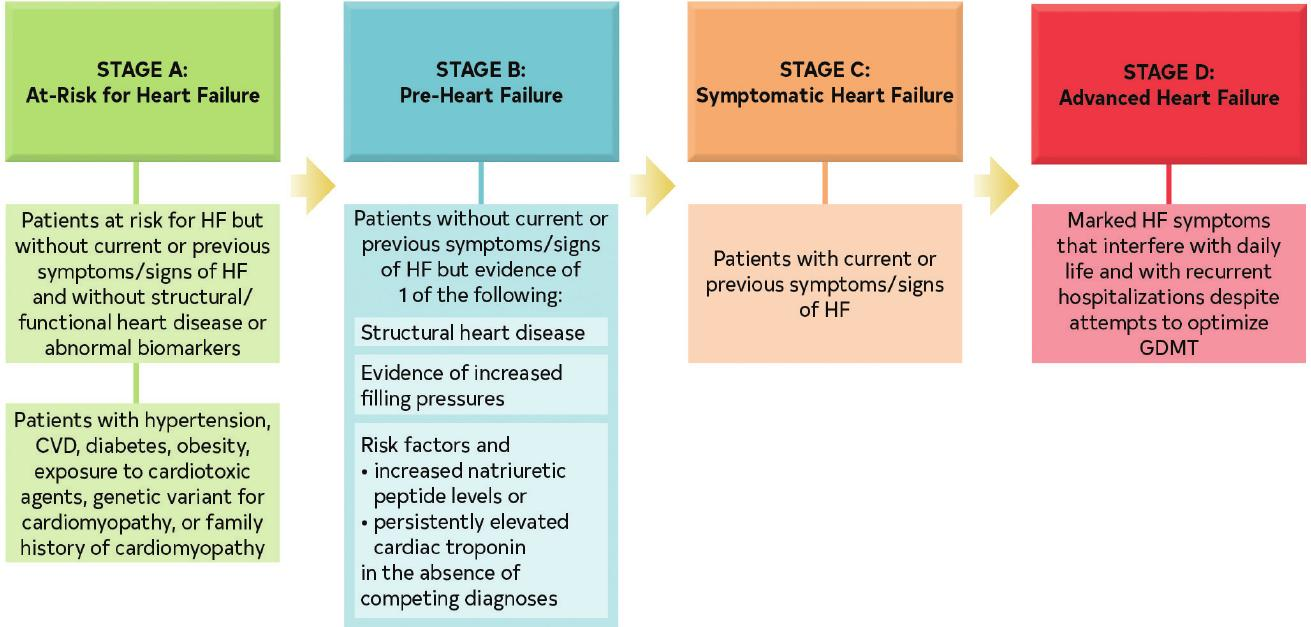

In [36]:
response = rag_chain.invoke(
    "What is stage of pre heart failure?"
)
print("-"*50)
print(f"ANSWER: {response}")

In [37]:
# response = rag_chain_with_sources.invoke(
#     "how to assess patients if it is suspected that they may have hf?"
# )

# print("Response:", response['response'])

# print("\n\nContext:")
# for text in response['context']['texts']:
#     print(text.text)
#     print("Page number: ", text.metadata.page_number)
#     print("\n" + "-"*50 + "\n")
# for image in response['context']['images']:
#     display_base64_image(image)

In [38]:
response = rag_chain_with_sources.invoke(
    "cause of hf?"
)
print("-"*50)
print("Response:", response['response'])
print("-"*50)

print("\n\nContext:")
for text in response['context']['texts']:
    print(text.text)
    print("Page number: ", text.metadata.page_number)
    print("\n" + "-"*50 + "\n")
for image in response['context']['images']:
    display_base64_image(image)

parse_docs
docs: 
images 0: []
texts: [<unstructured.documents.elements.CompositeElement object at 0x0000022222DF7250>, <unstructured.documents.elements.CompositeElement object at 0x0000022222FE8890>, <unstructured.documents.elements.CompositeElement object at 0x00000222243A0D10>, <unstructured.documents.elements.CompositeElement object at 0x0000022222DF5E50>, <unstructured.documents.elements.CompositeElement object at 0x0000022222E21A90>]
build_prompt
prompt: 
[{'type': 'text', 'text': '\n    Answer the question based only on the following context, which can include text, tables, and the below image.\n    Context: known risk factors with high relative risk and popula- tion attributable risk for development of HF. There- fore, a large proportion of the US population can be categorized as being at-risk for HF or stage A HF. The common causes of HF include ischemic heart disease and myocardial infarction (MI), hypertension, and valvular heart disease (VHD). Other causes can include famil